In [2]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import math
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import display_html
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display
from IPython.display import HTML
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
# di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [4]:
# read current ads 
ads_v7 = pd.read_csv(r'gs://aes-datahub-0001-raw/OMS/IPL/ADS_V7.csv')
ads_v7 = ads_v7[ads_v7.EVENT=='STORM']
ads_v7.reset_index(drop=True, inplace=True)
ads_v7.head()

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,TEMPERATURE,DEWPOINT,VISIBILITY,WINDSPEED,WIND_MAX_SPEED,GUST,MAX_TEMP,MIN_TEMP,PRECIPITATION,FOG_FLG,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE
0,2001317842,2.000391e+09,648-B/72,STORM,2007-02-24 20:02:00,2007-02-24 21:45:00,1702.0,ASWITCH,170.0,183,1282.0,4.0,2007-02-24 21:32:00,1282.0,6101.333333,6101.333333,0,103.0000,27.2,15.9,9.4,13.0,19.0,22.9,35.1,21.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,SUBSTATION,LOCK OUT,NaN,MISCELLANEOUS,NO CAUSE-PATROLLED,39.724871,-86.037147,2.0,8
1,2001317865,2.000391e+09,237--/42,STORM,2007-02-24 20:18:26,2007-02-24 21:50:00,1402.0,FUSE,140.0,2,4.0,0.0,2007-02-24 22:48:26,4.0,100.000000,100.000000,0,91.5667,27.2,15.9,9.4,13.0,19.0,22.9,35.1,21.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,TREE,ON PRIMARY,39.896820,-86.145802,3.0,8
2,2001317856,2.000391e+09,M15-U/168,STORM,2007-02-24 20:31:55,2007-02-25 00:23:42,7001.0,1TBOH,700.0,1,1.0,0.0,2007-02-25 00:01:55,1.0,15.000000,15.000000,0,231.7833,27.2,15.9,9.4,13.0,19.0,22.9,35.1,21.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MONROVIA,FUSE,DEFECTIVE FUSE,NaN,MISCELLANEOUS,OTHER,39.543034,-86.573913,1.0,9
3,2001317899,2.000391e+09,495-A/106,STORM,2007-02-24 20:56:03,2007-02-25 00:30:00,1257.0,FUSE,125.0,133,271.0,2.0,2007-02-24 23:26:03,271.0,503.666667,503.666667,0,213.9500,27.2,15.9,9.4,13.0,19.0,22.9,35.1,21.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,O.H. EQUIPMENT,BAD OR BROKEN INSULATOR,39.787152,-86.252024,4.0,10
4,2001317873,2.000391e+09,801QA/2,STORM,2007-02-24 20:59:10,2007-02-24 21:15:02,7056.0,FUSE,705.0,4,70.0,1.0,2007-02-24 23:29:10,70.0,870.000000,870.000000,0,15.8667,27.2,15.9,9.4,13.0,19.0,22.9,35.1,21.9,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MOORESVILLE,POLE BURNING,POLE BURNING,NaN,O.H. EQUIPMENT,BAD CUTOUT OR BARREL,39.631311,-86.375051,1.0,11


In [5]:
cat_features=[i for i in ads_v7.columns if ads_v7.dtypes[i]=='object']

In [6]:
ads_v7 = ads_v7._get_numeric_data()

In [7]:
ads_v7.isna().sum()

OUTAGE_ID                         0
INCIDENT_ID                       0
CIRCT_ID                          0
SUBST_ID                          0
CALL_QTY                          0
DOWNSTREAM_CUST_QTY               0
KEY_CUST_QTY                      0
CUST_QTY                          0
DOWNSTREAM_KVA_VAL              106
KVA_VAL                           0
DAY_FLAG                          0
TTR                               0
TEMPERATURE                       2
DEWPOINT                          2
VISIBILITY                        2
WINDSPEED                         2
WIND_MAX_SPEED                    2
GUST                           1280
MAX_TEMP                         60
MIN_TEMP                          2
PRECIPITATION                  4325
FOG_FLG                           2
rain_drizzle                      2
snow_ice_pellets                  2
hail                              2
thunder                           2
tornado_funnel_cloud              2
POLE_CLUE_FLG               

In [8]:
ads_v7.dropna(inplace=True)

In [10]:
from scipy.stats import zscore
ads_v7.apply(zscore)

,OUTAGE_ID,INCIDENT_ID,CIRCT_ID,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,TEMPERATURE,DEWPOINT,VISIBILITY,WINDSPEED,WIND_MAX_SPEED,GUST,MAX_TEMP,MIN_TEMP,PRECIPITATION,FOG_FLG,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,LAT,LONG,ZONE,LIVE_OUTAGE
0,-1.847990,-1.856304,-0.611352,-0.639022,2.729167,4.270130,1.547761,4.270131,4.683694,5.039187,-1.144363,-0.683734,-2.278253,-2.595995,0.491694,0.915025,-0.286174,-0.779836,-2.413143,-1.777864,-0.744929,-0.256997,0.461072,3.062177,-0.049844,-1.119139,NaN,8.609433,-0.016832,NaN,2.451313,-0.230073,-0.03859,-0.047655,-0.236652,10.802392,-0.047655,-0.135872,-0.045361,-0.025252,-0.246178,-0.022269,-0.035723,-0.193163,-0.03859,-0.132038,NaN,NaN,-0.011901,-0.020616,-0.046902,-0.364709,16.610887,15.309583,-0.011901,NaN,-0.264432,NaN,-0.051252,-0.043766,NaN,-0.014576,-0.026619,4.178689,-0.014576,-0.094498,-0.121963,-0.261199,-0.045361,NaN,-0.033678,NaN,-0.089809,-0.085292,-0.055263,-0.431057,-0.086547,-0.056537,-0.807600,1.041379,-0.839711,-0.693104
1,-1.847931,-1.856285,-0.765573,-0.848831,-0.448523,-0.323814,-0.294745,-0.323815,-0.313263,-0.291678,-1.144363,-0.695070,-2.278253,-2.595995,0.491694,0.915025,-0.286174,-0.779836,-2.413143,-1.777864,-0.744929,-0.256997,0.461072,3.062177,-0.049844,-1.119139,NaN,-0.116152,-0.016832,NaN,-0.407945,-0.230073,-0.03859,-0.047655,-0.236652,-0.092572,-0.047655,-0.135872,-0.045361,-0.025252,-0.246178,-0.022269,-0.035723,-0.193163,-0.03859,-0.132038,NaN,NaN,-0.011901,-0.020616,-0.046902,-0.364709,-0.060201,-0.065319,-0.011901,NaN,-0.264432,NaN,-0.051252,-0.043766,NaN,-0.014576,-0.026619,-0.239310,-0.014576,-0.094498,-0.121963,-0.261199,-0.045361,NaN,-0.033678,NaN,-0.089809,-0.085292,-0.055263,-0.431057,-0.086547,-0.056537,1.004104,0.013570,0.173639,-0.693104
2,-1.847954,-1.856250,2.112705,3.067594,-0.466079,-0.334598,-0.294745,-0.334599,-0.384037,-0.367181,-1.144363,-0.556050,-2.278253,-2.595995,0.491694,0.915025,-0.286174,-0.779836,-2.413143,-1.777864,-0.744929,-0.256997,0.461072,3.062177,-0.049844,-1.119139,NaN,-0.116152,-0.016832,NaN,-0.407945,-0.230073,-0.03859,-0.047655,-0.236652,-0.092572,-0.047655,-0.135872,-0.045361,-0.025252,-0.246178,-0.022269,-0.035723,-0.193163,-0.03859,-0.132038,NaN,NaN,-0.011901,-0.020616,-0.046902,-0.364709,-0.060201,-0.065319,-0.011901,NaN,-0.264432,NaN,-0.051252,-0.043766,NaN,-0.014576,-0.026619,-0.239310,-0.014576,-0.094498,-0.121963,-0.261199,-0.045361,NaN,-0.033678,NaN,-0.089809,-0.085292,-0.055263,-0.431057,-0.086547,-0.056537,-2.723482,-4.036056,-1.853061,-0.685486
3,-1.847843,-1.856224,-0.840113,-0.953735,1.851352,0.635954,0.626508,0.635953,0.022847,0.066891,-1.144363,-0.573731,-2.278253,-2.595995,0.491694,0.915025,-0.286174,-0.779836,-2.413143,-1.777864,-0.744929,-0.256997,0.461072,3.062177,-0.049844,-1.119139,NaN,8.609433,-0.016832,NaN,2.451313,-0.230073,-0.03859,-0.047655,-0.236652,10.802392,-0.047655,7.359889,-0.045361,-0.025252,-0.246178,-0.022269,-0.035723,-0.193163,-0.03859,-0.132038,NaN,NaN,-0.0

In [9]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(ads_v7)

In [11]:
pca = PCA(n_components=1)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print("original shape:   ", X_std.shape)
print("transformed shape:", X_pca.shape)

original shape:    (14123, 82)
transformed shape: (14123, 1)


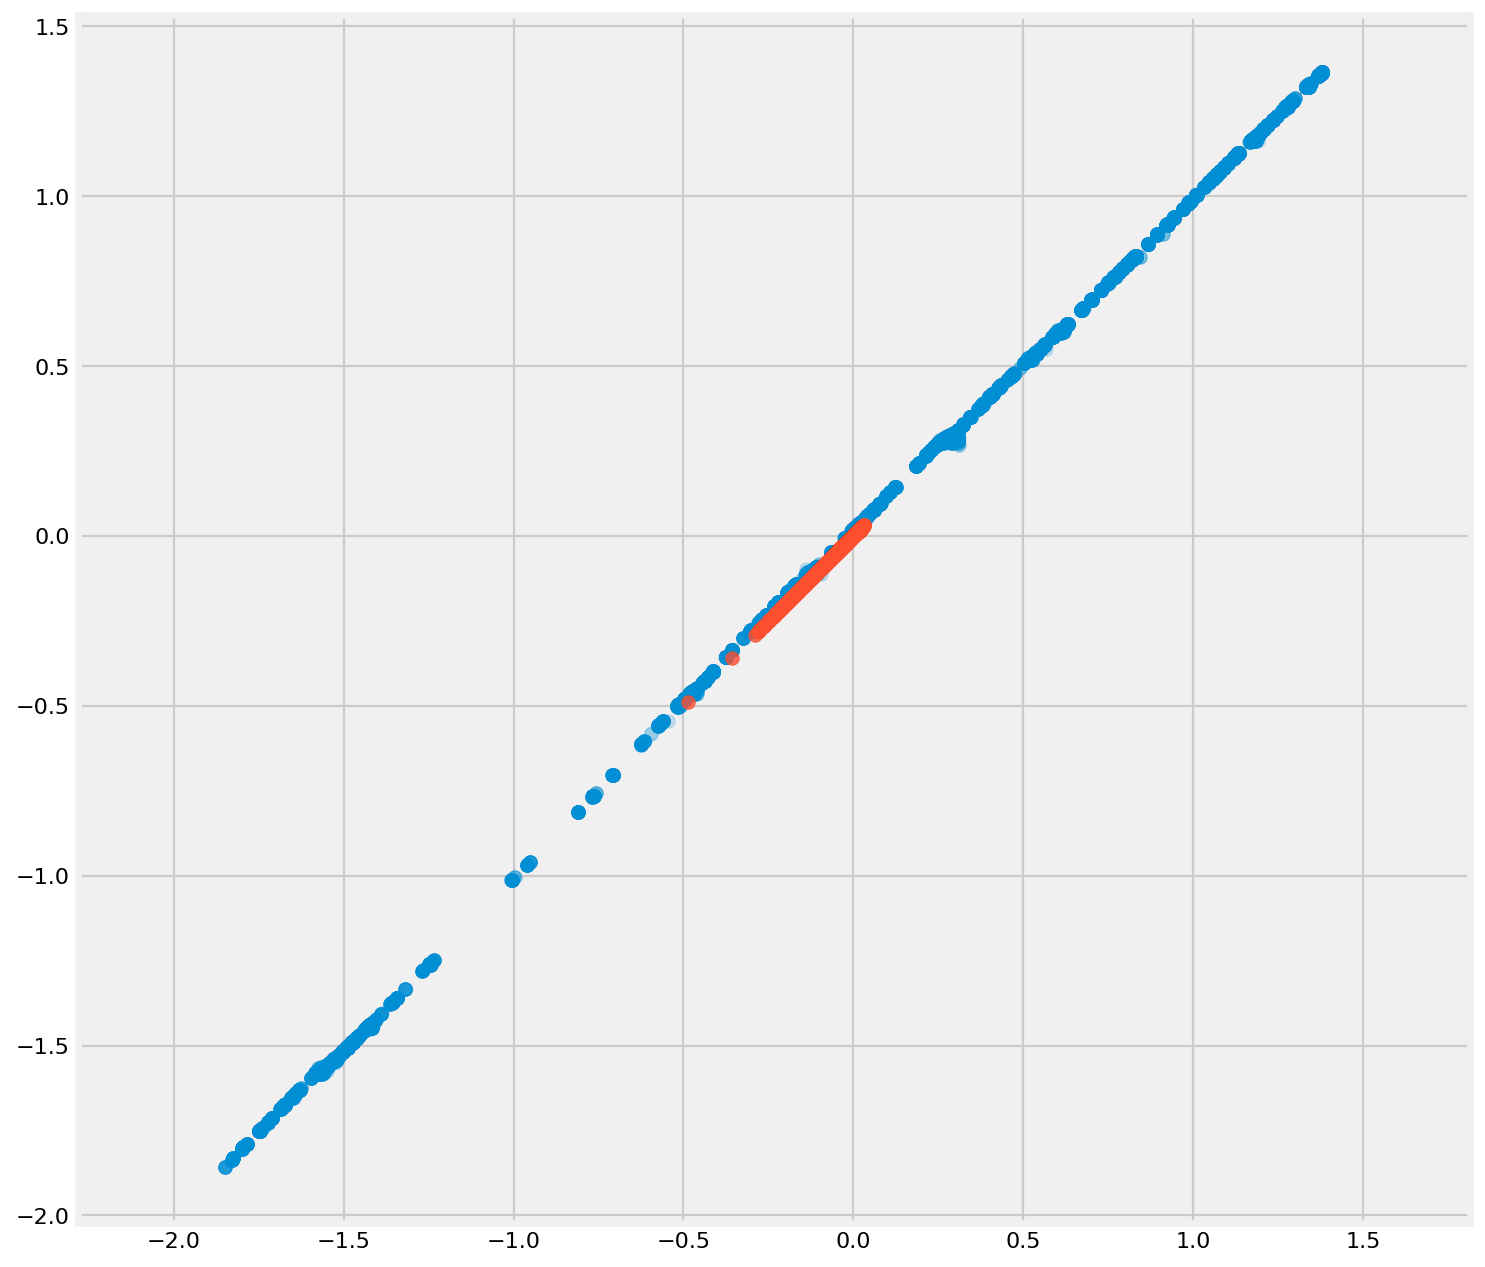

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')


X_new = pca.inverse_transform(X_pca)
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## Choosing the number of compnents

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

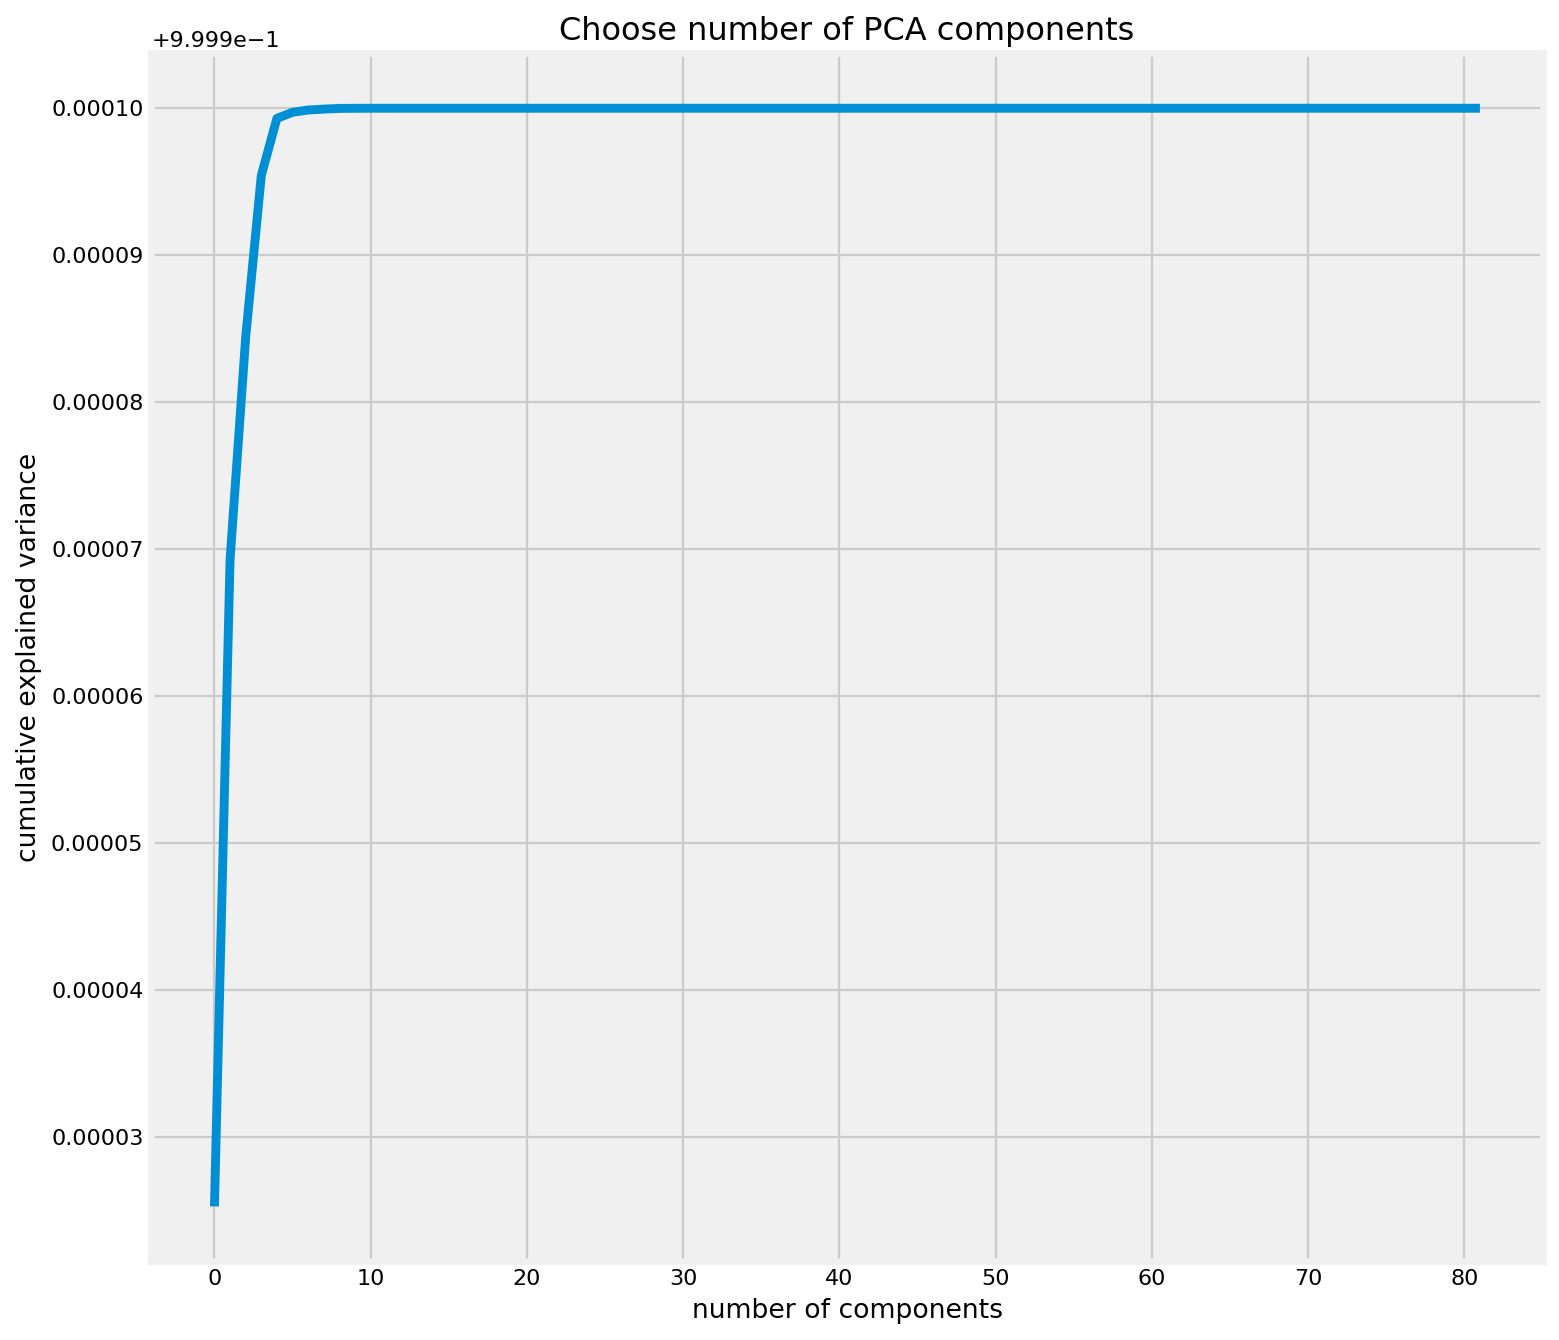

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# Choosing number of components 
pca = PCA().fit(ads_v7)
plt.title("Choose number of PCA components")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

In [14]:
print(pca.components_)

[[-7.76682969e-01 -6.29891673e-01  2.44402392e-05 ... -1.46474510e-09
   2.83185518e-08  7.13942289e-05]
 [ 6.29742155e-01 -7.76495373e-01 -1.31388491e-02 ...  1.30286900e-06
   1.80780854e-05  3.08300131e-03]
 [ 8.11586737e-03 -9.97167961e-03  9.98727338e-01 ... -1.00065965e-05
  -1.21857420e-04 -2.59558346e-03]
 ...
 [-0.00000000e+00 -4.06100779e-23 -1.65946600e-20 ...  2.34187669e-17
   4.11996826e-18  4.33680869e-19]
 [-0.00000000e+00  9.93788060e-23 -1.87528812e-18 ... -8.67361738e-18
  -2.60208521e-18  6.93889390e-18]
 [-0.00000000e+00 -1.19203189e-21 -7.82339744e-18 ... -5.55111512e-17
  -5.55111512e-17 -1.66533454e-16]]


In [15]:
print(pca.explained_variance_)

[2.50478029e+11 1.10264862e+07 3.79040344e+06 2.75802719e+06
 9.72742617e+05 1.02929117e+05 3.91654377e+04 1.49994420e+04
 1.18517731e+04 1.87763356e+03 9.65782186e+02 1.51687523e+02
 2.02201010e+01 1.17280862e+01 7.80105550e+00 5.28726308e+00
 3.51963265e+00 1.70000120e+00 8.31479649e-01 7.29390141e-01
 2.67151834e-01 2.45525357e-01 2.28489610e-01 1.53822547e-01
 9.52913353e-02 8.70111692e-02 6.89415776e-02 6.16719658e-02
 4.92822536e-02 4.77611513e-02 3.78503042e-02 3.73290440e-02
 2.42262215e-02 2.15746775e-02 1.81460227e-02 1.54574623e-02
 1.26779983e-02 1.05435751e-02 9.78866058e-03 8.97140076e-03
 7.98990179e-03 5.02488197e-03 4.51455336e-03 3.99624858e-03
 3.37313343e-03 3.14685222e-03 2.89901089e-03 2.73914837e-03
 2.52507924e-03 2.41255720e-03 2.31365856e-03 2.12831534e-03
 2.08307173e-03 1.78245586e-03 1.69872685e-03 1.51108276e-03
 1.39776376e-03 1.10234368e-03 7.46582489e-04 6.88955434e-04
 6.54377930e-04 6.43289705e-04 4.13705161e-04 3.96631678e-04
 3.38666677e-04 3.297558

In [16]:
## Covariance Matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00007081  0.99997888 -0.00636748 ...  0.00714903 -0.01404463
  -0.27178649]
 [ 0.99997888  1.00007081 -0.00616716 ...  0.00660818 -0.01484503
  -0.27284317]
 [-0.00636748 -0.00616716  1.00007081 ... -0.18315671 -0.2398329
  -0.03095098]
 ...
 [ 0.00714903  0.00660818 -0.18315671 ...  1.00007081  0.05214082
   0.03205085]
 [-0.01404463 -0.01484503 -0.2398329  ...  0.05214082  1.00007081
   0.05419577]
 [-0.27178649 -0.27284317 -0.03095098 ...  0.03205085  0.05419577
   1.00007081]]


In [17]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00007081  0.99997888 -0.00636748 ...  0.00714903 -0.01404463
  -0.27178649]
 [ 0.99997888  1.00007081 -0.00616716 ...  0.00660818 -0.01484503
  -0.27284317]
 [-0.00636748 -0.00616716  1.00007081 ... -0.18315671 -0.2398329
  -0.03095098]
 ...
 [ 0.00714903  0.00660818 -0.18315671 ...  1.00007081  0.05214082
   0.03205085]
 [-0.01404463 -0.01484503 -0.2398329  ...  0.05214082  1.00007081
   0.05419577]
 [-0.27178649 -0.27284317 -0.03095098 ...  0.03205085  0.05419577
   1.00007081]]


In [18]:
# eigen decompoasition on covariance matrix 

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.01527121 -0.12370629  0.35320093 ...  0.          0.
   0.        ]
 [ 0.0153856  -0.12371517  0.35484412 ...  0.          0.
   0.        ]
 [ 0.00132467 -0.01053661  0.02584844 ...  0.          0.
   0.        ]
 ...
 [ 0.01101701 -0.01895869 -0.02179747 ...  0.          0.
   0.        ]
 [-0.00289443  0.01958568 -0.06010775 ...  0.          0.
   0.        ]
 [ 0.02778357  0.04206487 -0.25384542 ...  0.          0.
   0.        ]]

Eigenvalues 
[7.03238823e+00 5.16725089e+00 2.93353357e+00 2.58314233e+00
 2.44198007e+00 2.32177843e+00 2.10469133e+00 1.99375911e+00
 1.96701892e+00 1.84858065e+00 1.80348010e+00 1.56917792e+00
 1.39214181e+00 1.38938267e+00 1.35481272e+00 1.25157063e+00
 1.23836527e+00 1.12973938e+00 1.18123269e-01 2.80661485e-02
 1.45555239e-02 1.00416897e-02 6.51027207e-05 1.82774579e-09
 1.76671509e-01 1.07112095e-01 7.49071994e-02 2.37133174e-02
 6.96661768e-02 4.70041712e-02 5.76564910e-02 5.61365248e-02
 2.35022020e-01 2.32160856e-01 2.6703537

In [19]:
## Eingen Values 

n_samples = X_std.shape[0]

pca = PCA()
X_transformed = pca.fit_transform(X_std)

# We center the data and compute the sample covariance matrix.
X_centered = X_std - np.mean(X_std, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

7.0318902893909465
7.032388228088675
5.166885012367951
5.167250887244898
2.933325853446201
2.9335335666492535
2.5829594252798884
2.5831423285106823
2.4418071632518576
2.4419800712792785
2.3216140331362953
2.3217784301079085
2.104542306988067
2.104691332785192
1.99361793998749
1.9937591110638226
1.9668796450526387
1.9670189227502062
1.8484497615943642
1.8485806530942677
1.8033524036274455
1.8034801017157887
1.569066812636473
1.5691779206107417
1.3920432418978534
1.392141814567583
1.38928429635478
1.389382673659436
1.354716790908898
1.3548127204366491
1.2514820132718407
1.2515706325901568
1.2382775901866796
1.2383652744799936
1.1296593894156968
1.1297393822913104
1.1159499819014944
1.116029003993402
1.0897220403246037
1.0897992051766296
1.0832045783834618
1.0832812817242354
1.0740689066301514
1.0741449630603042
1.0460110463699888
1.0460851159809772
1.0262791015317818
1.0263517738941614
1.020236761698206
1.020309006193442
1.015817889504493
1.0158898210927596
1.0141394292009724
1.014211241

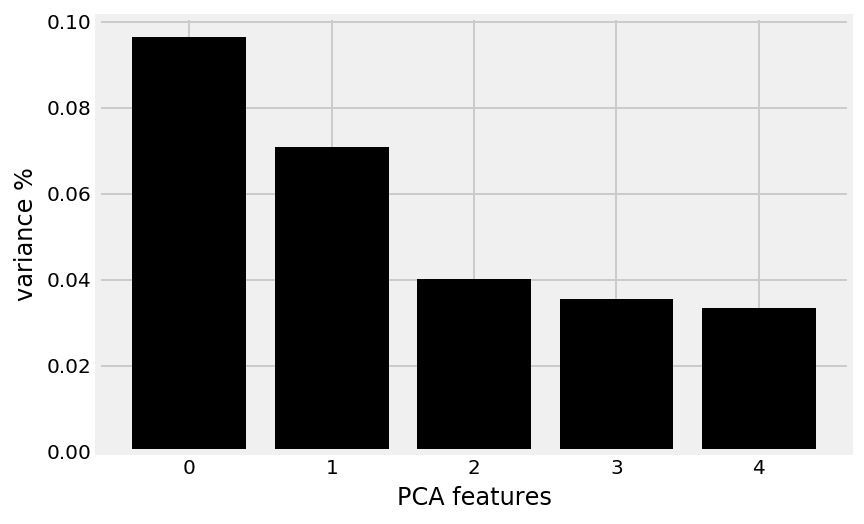

In [20]:
# Create a PCA instance: pca
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

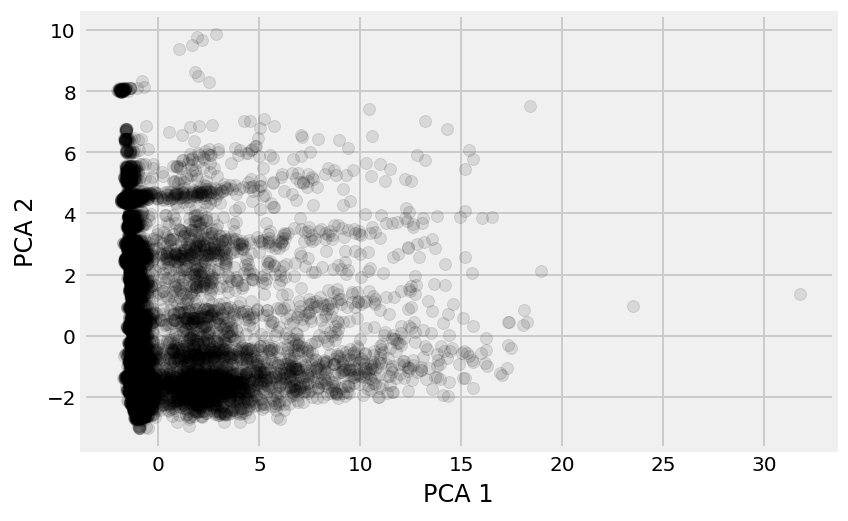

In [21]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

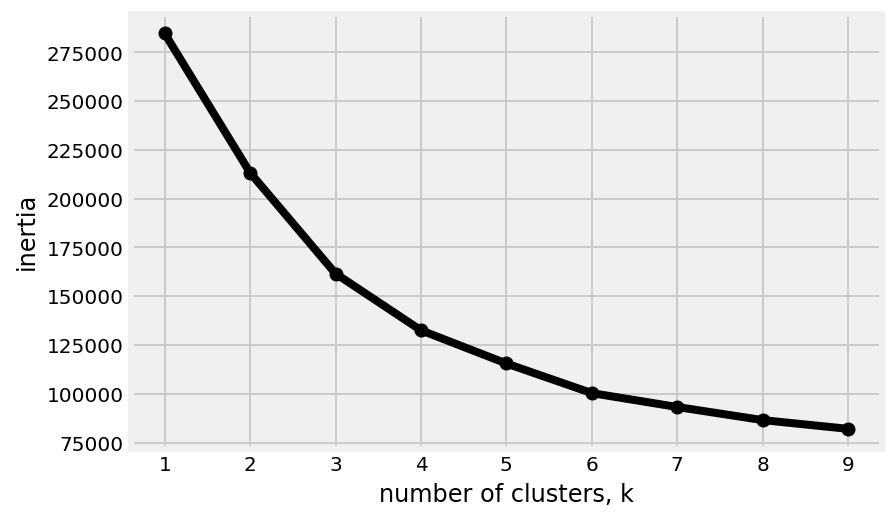

In [22]:
## Find Clusters 

ks = range(1, 10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

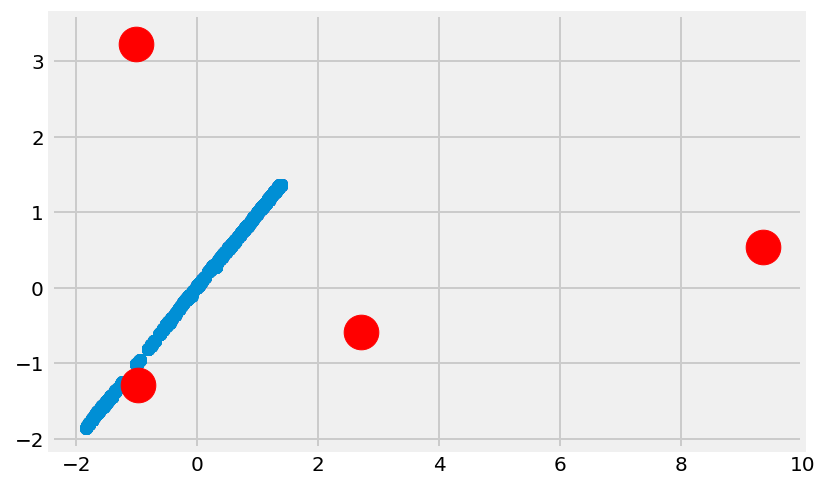

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=5000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_components)
plt.scatter(X_std[:,0], X_std[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
labels = kmeans.predict(X_std)
centroids = kmeans.cluster_centers_


In [26]:
labels

array([2, 1, 1, ..., 0, 0, 0], dtype=int32)

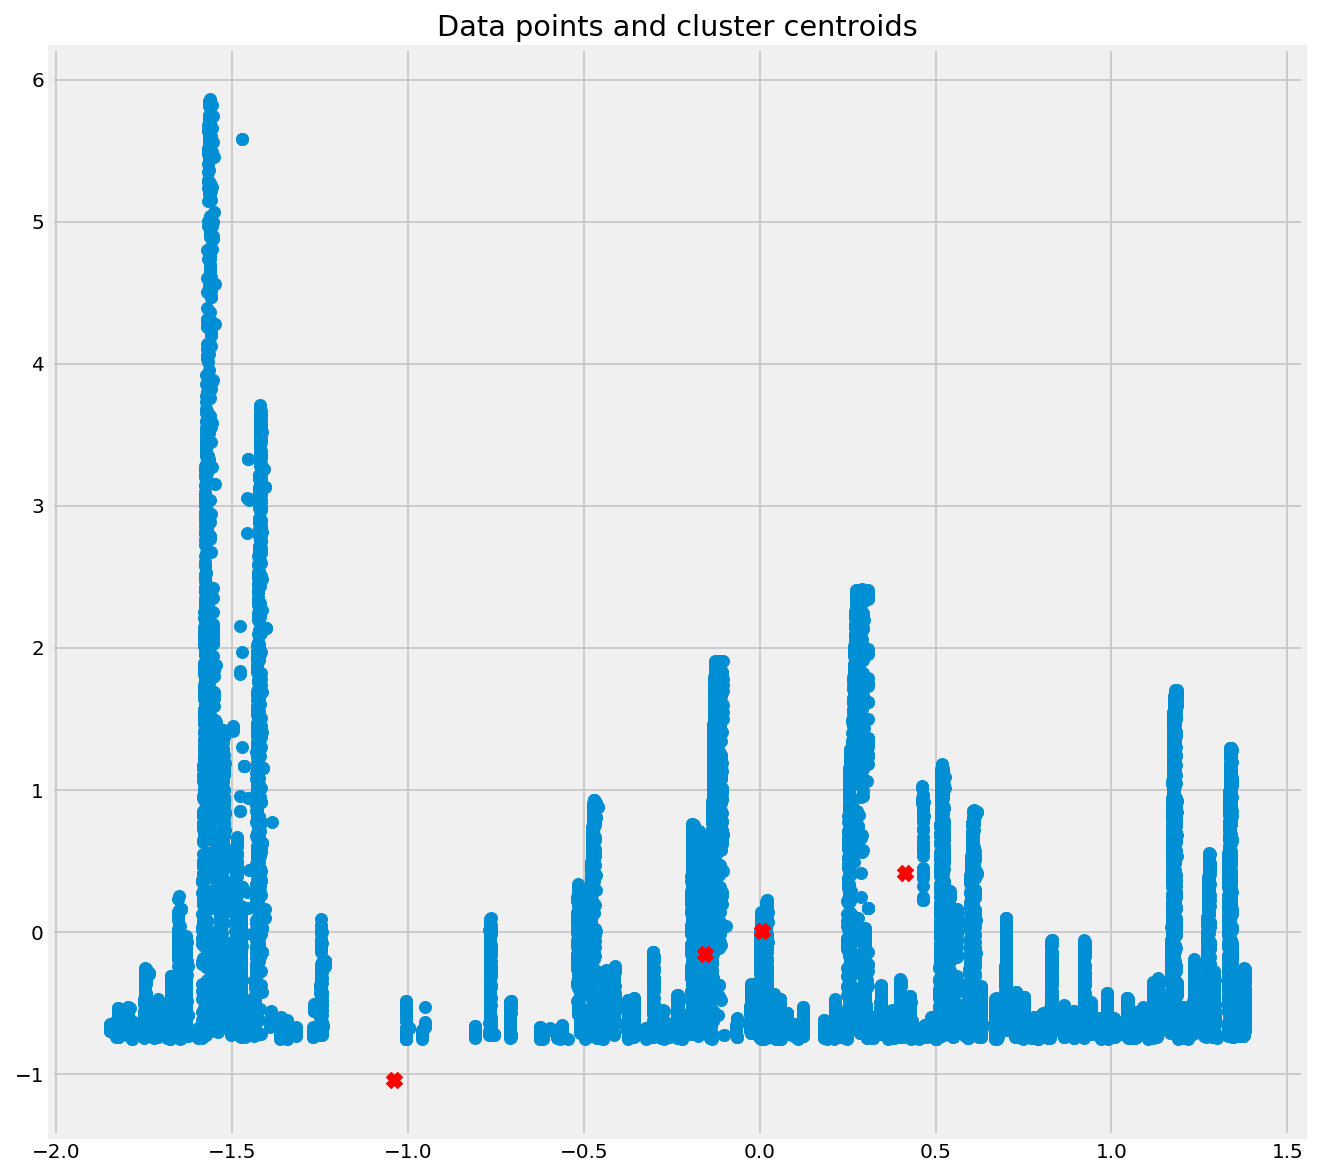

In [27]:
fig = plt.figure(figsize=(10, 10))

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X_std[:, 0], X_std[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/

In [12]:
df = pd.read_csv('gs://aes-datahub-0001-raw/OMS/2002-2020/IPL/HIS_LOCATION_IPL.csv', sep='|', encoding = "ISO-8859-1")

In [13]:
df

,LOCATION_ID,INCIDENT_ID,INCIDENT_DEVICE_ID,PRIMARY_LOC_FLG,LOCATION_TYPE,LOCATION_TYPE_ID,DIST_NO,DISPLAY_TEXT,STRCTUR_NO,GEO_X_COORD,GEO_Y_COORD,LOC_DESC,CITY_NAM,ZIP_CD,LOCATION_DIRECTION,DEVICE_LOCATION,MAJ_OTG_ID,CLIMATIC_CD,PHASE_AFFECTED,CALL_QTY_TOTAL,DOWNSTREAM_PRICUST_QTY_TOTAL,DOWNSTREAM_CUST_QTY_TOTAL,DOWNSTREAM_KVA_VAL_TOTAL,FAC_JOB_STATUS_CD,CREW_ACTION_ID,CAD_ID,LAST_MOBILE_UPDATE,OCCURN_CD,POLICE_OPERATOR_ID,POLICE_INC_NO,FIRE_OPERATOR_ID,FIRE_INC_NO,SWP_CODE,STP_STEP,WORK_ORD_1_NO,WORK_ORD_2_NO,WORK_ORD_3_NO,WORK_ORD_4_NO,WORK_ORD_5_NO,CREATION_DATETIME,ENERGIZED_DATETIME,ETR_DATETIME,STOP_ETR_RECALC_FLG,REC_LOCK,DELETE_FLG,COMPL_DATETIME,CAUSE_CD,CLIMATIC_DESC,OCCURN_DESC,CAUSE_DESC,MODIFY_FLG,FREEZE_LEAD_DEVICE,INSERTED_DATE,ETR_SOURCE,LOG_ITEM,OMSCAD_CLUE_CD,OMSCAD_CALL_TYPE_CD,CALL_UNIQUE_QTY,CALL_PRICUST_QTY,DIST_DESC,FAC_JOB_STATUS_DESC,OMSCAD_CALL_TYPE_DESC,OMSCAD_CLUE_DESC,FAC_JOB_STATUS_DEF_COLOR_NO,LAST_ETR_CHANGE_USERNAME,EXTERNAL_WFMS_ID,RESTORATION_VAL_FLG,RESTORATION_PRIORITY,ACKNOWLEDGEABLE_STATE,PRIORITY_SCORE,MANUAL_ENERGIZED_DATETIME_FLG
0,2000047063,2.000043e+09,2.000153e+09,T,NaN,NaN,1.0,^30/M21-Y^50 B^97,M21-Y/30,52677.347,1557778.385,NaN,EMINENCE,46125-0143,NaN,NaN,NaN,NaN,B,1.0,0.0,5.0,50.0,H,2.000006e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2002,03-12-2002,03-12-2002,F,NaN,NaN,03-12-2002,NaN,NaN,NaN,NaN,NaN,F,19-04-2006 14:52:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NO NEED,NaN,F
1,2000047065,2.000043e+09,2.000153e+09,T,NaN,NaN,1.0,<NCC>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,1.0,0.0,1.0,0.0,H,2.000006e+09,IPL-120302-000087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2002,03-12-2002,NaN,F,NaN,NaN,03-12-2002,NaN,NaN,NaN,NaN,NaN,F,19-04-2006 14:52:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NO NEED,NaN,F
2,2000047066,2.000043e+09,2.000153e+09,T,NaN,NaN,1.0,^36/460-B^25 A^50 C^4380,460-B/36,174279.947,1654093.553,NaN,INDIANAPOLIS,46222-2602,NaN,NaN,NaN,NaN,C,1.0,0.0,1.0,12.0,H,2.000006e+09,IPL-120302-000118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2002,03-12-2002,NaN,F,NaN,NaN,03-12-2002,NaN,NaN,NaN,NaN,NaN,F,19-04-2006 14:52:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NO NEED,NaN,F
3,2000047067,2.000043e+09,2.000153e+09,T,NaN,NaN,1.0,^200/725--^50 B^8554,725--/200,189186.402,1614775.035,NaN,INDIANAPOLIS,46217-3727,NaN,NaN,NaN,NaN,B,1.0,0.0,1.0,50.0,H,2.000006e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2002,03-12-2002,03-12-2002,F,NaN,NaN,03-12-2002,NaN,NaN,NaN,NaN,NaN,F,19-04-2006 14:52:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NO NEED,NaN,F
4,2000047072,2.000043e+09,2.000153e+09,T,NaN,NaN,1.0,^229/605-A^750 ABC^6555,605-A/229,187338.058,1636619.732,NaN,INDIANAPOLIS,46225-1978,NaN,NaN,NaN,NaN,C,1.0,0.0,0.0,250.0,H,2.000006e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03-12-2002,03-12-2002,03-12-2002,F,NaN,NaN,03-12-2002,NaN,NaN,NaN,NaN,NaN,F,19-04-2006 14:52:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,NaN,NO NEED,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968303,"2001684409,""2001517387"",""2002715494"",""T"","""",""""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4968304,"2001684824,""2001517736"",""2002716140"",""T"","""",""""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN